# The  Dynamics of Friendships at Habib University


In [ ]:
from google.colab import files
upload = files.upload()

Saving The Dynamics of Friendships at Habib University.csv to The Dynamics of Friendships at Habib University.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as mtick

# Data Wrangling

In [ ]:
df = pd.read_csv('The Dynamics of Friendships at Habib University.csv', encoding='latin1')

In [ ]:
df.head()

,Timestamp,What is your batch?,What is your major?,To which gender identity do you most identify with?,About what percentage of your friends would you say are from your own batch?,About what percentage of your friends would you say are from your own major?,About what percentage of your friends would you say identify as the same gender as you do?,"About what percentage of the people that you interact with in class do you also interact with outside of classes? (The dynamics of our courses often force students to interact with each other, e.g. in group presentations and projects etc., however, you might not necessarily interact outside of class)",What would you say you look for when making friends at Habib? (Please check all that apply)
0,2020/06/16 7:54:24 PM GMT+5,Class of 2022,CS,Female,80%,80%,60%,70%,Shared Interests;Similar Social Status;Similar...
1,2020/06/16 7:54:52 PM GMT+5,Class of 2023,CS,Female,90%,60%,70%,40%,Shared Interests;Similar Personality to yourself
2,2020/06/16 7:58:58 PM GMT+5,Class of 2023,CND,Female,80%,30%,90%,70%,Similar Personality to yourself;Similar Morals
3,2020/06/16 7:59:18 PM GMT+5,Class of 2021,CS,Male,80%,70%,90%,60%,Shared Interests;Similar Personality to yourself
4,2020/06/16 8:01:14 PM GMT+5,Class of 2023,CS,Male,90%,60%,50%,30%,Shared Interests;Similar Personality to yourself


In [ ]:
df.rename(columns = {'To which gender identity do you most identify with?':'Gender', 'About what percentage of your friends would you say are from your own batch?':'Batch', 
                              'About what percentage of your friends would you say are from your own major?':'Major'}, inplace = True) 

In [ ]:
df.rename(columns = {'About what percentage of your friends would you say identify as the same gender as you do?':'friendsOfSameGender', 'About what percentage of the people that you interact with in class do you also interact with outside of classes? (The dynamics of our courses often force students to interact with each other, e.g. in group presentations and projects etc., however, you might not necessarily interact outside of class)':'friendsInAndOutOfClass', 
                              'What would you say you look for when making friends at Habib? (Please check all that apply)':'makingFriends'}, inplace = True) 

In [ ]:
df.rename(columns = {'What is your batch?':'Batch', 'What is your major?':'Major', 
                              'Batch':'friendsInBatch','Major':'friendsInMajor'}, inplace = True) 

In [ ]:
df.drop(columns='Timestamp', inplace=True)

In [ ]:
indexNames = df[ df['Gender'] == 'Doge' ].index
# Delete these row indexes from dataFrame
df.drop(indexNames, inplace=True)

In [ ]:
df.head()

,Batch,Major,Gender,friendsInBatch,friendsInMajor,friendsOfSameGender,friendsInAndOutOfClass,makingFriends
0,Class of 2022,CS,Female,80%,80%,60%,70%,Shared Interests;Similar Social Status;Similar...
1,Class of 2023,CS,Female,90%,60%,70%,40%,Shared Interests;Similar Personality to yourself
2,Class of 2023,CND,Female,80%,30%,90%,70%,Similar Personality to yourself;Similar Morals
3,Class of 2021,CS,Male,80%,70%,90%,60%,Shared Interests;Similar Personality to yourself
4,Class of 2023,CS,Male,90%,60%,50%,30%,Shared Interests;Similar Personality to yourself


In [ ]:
df['friendsInBatch'] = df['friendsInBatch'].map(lambda x: x.rstrip('%'))
df['friendsInMajor'] = df['friendsInMajor'].map(lambda x: x.rstrip('%'))
df['friendsOfSameGender'] = df['friendsOfSameGender'].map(lambda x: x.rstrip('%'))
df['friendsInAndOutOfClass'] = df['friendsInAndOutOfClass'].map(lambda x: x.rstrip('%'))

In [ ]:
convert_dict = {'friendsInBatch': int, 
                'friendsInMajor': int,
                'friendsOfSameGender': int, 
                'friendsInAndOutOfClass': int,
               } 
  
df = df.astype(convert_dict) 

In [ ]:
df.dtypes

Batch                     object
Major                     object
Gender                    object
friendsInBatch             int64
friendsInMajor             int64
friendsOfSameGender        int64
friendsInAndOutOfClass     int64
makingFriends             object
dtype: object

# Analysis



Major Distribution of Responses


In [ ]:
majorDistribution = (df['Major'].value_counts()/110)*100

In [ ]:
majorDistribution

CS     37.272727
SDP    34.545455
CND    18.181818
EE      9.090909
CLS     0.909091
Name: Major, dtype: float64

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

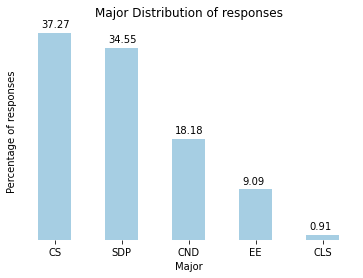

In [ ]:
ax = majorDistribution.plot(kind='bar', colormap='Paired')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x + 0.05, y + height + 1))

plt.title('Major Distribution of responses')
plt.xlabel('Major')
plt.ylabel('Percentage of responses')
plt.xticks(rotation=0)

Batch Distribution of Responses

In [ ]:
batchDistribution = (df['Batch'].value_counts()/110)*100

In [ ]:
batchDistribution

Class of 2021    53.636364
Class of 2020    16.363636
Class of 2022    16.363636
Class of 2023    13.636364
Name: Batch, dtype: float64

Text(0, 0.5, 'Percentage of responses')

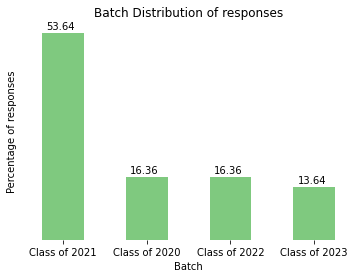

In [ ]:
ax = batchDistribution.plot(kind='bar', colormap='Accent')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x + 0.05, y + height + 1))

plt.xticks(rotation=0)
plt.title('Batch Distribution of responses')
plt.xlabel('Batch')
plt.ylabel('Percentage of responses')

Gender Distribution of Responses

In [ ]:
genderDistribution = (df['Gender'].value_counts()/110)*100

In [ ]:
genderDistribution

Female               70.909091
Male                 28.181818
Prefer not to say     0.909091
Name: Gender, dtype: float64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

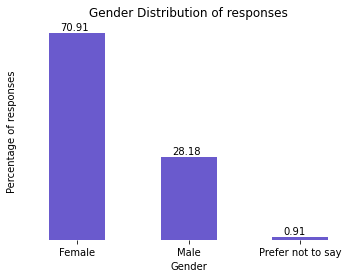

In [ ]:
ax = genderDistribution.plot(kind='bar', color='slateblue')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x + 0.10, y + height + 1))

plt.title('Gender Distribution of responses')
plt.xlabel('Gender')
plt.ylabel('Percentage of responses')
plt.xticks(rotation=0)

In [ ]:
apple = df['friendsInAndOutOfClass'].value_counts().sort_index(ascending=False)

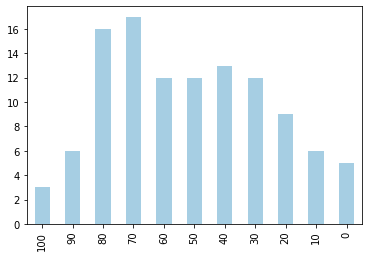

In [ ]:
apple.plot(kind='bar', colormap='Paired')

In [ ]:
df2 = df.groupby('Gender')['friendsOfSameGender']

In [ ]:
df2

Gender
Female               AxesSubplot(0.125,0.125;0.775x0.755)
Male                 AxesSubplot(0.125,0.125;0.775x0.755)
Prefer not to say    AxesSubplot(0.125,0.125;0.775x0.755)
Name: friendsOfSameGender, dtype: object

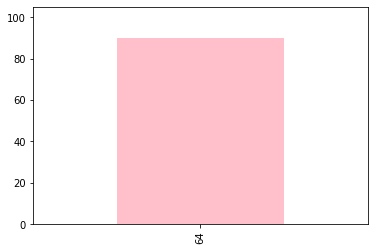

In [ ]:
df2.plot(kind='bar', color='pink')

In [ ]:
df3 = df.groupby('Major')['friendsInMajor'].mean()

In [ ]:
df3 = df3.sort_values(ascending=True)

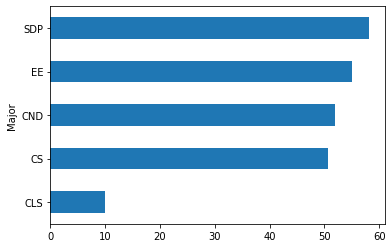

In [ ]:
df3.plot(kind='barh')

In [ ]:
df0 = df.groupby(['Major','Gender']).friendsOfSameGender.mean()

In [230]:
CSEE = 100 - ((df0['CS'] + df0['EE'])/200*100)
CSEE = CSEE.dropna()
CSEE

Gender
Female    52.916667
Male      41.205357
Name: friendsOfSameGender, dtype: float64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

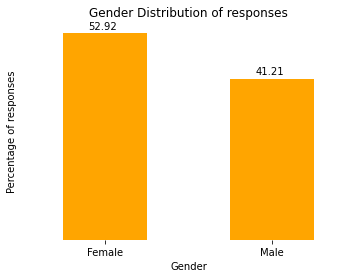

In [ ]:
ax = CSEE.plot(kind='bar', color='orange')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.2f}'.format(height), (x + 0.15, y + height + 1))

plt.title('SSE Students')
plt.xlabel('Gender')
plt.ylabel('Percentage of friends of other genders')
plt.xticks(rotation=0)